In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Set random seed for reproducibility
np.random.seed(42)
# Display settings
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load the dataset
file_path = os.path.join(os.getcwd(),"data", "dynamic_pricing.csv")  # Replace with the correct file path
data = pd.read_csv(file_path)

# Initial data overview
print("Shape of the dataset:", data.shape)
print("\nFirst 5 rows of the dataset:")
print(data.head())

Shape of the dataset: (1000, 10)

First 5 rows of the dataset:
   Number_of_Riders  Number_of_Drivers Location_Category  \
0                90                 45             Urban   
1                58                 39          Suburban   
2                42                 31             Rural   
3                89                 28             Rural   
4                78                 22             Rural   

  Customer_Loyalty_Status  Number_of_Past_Rides  Average_Ratings  \
0                  Silver                    13             4.47   
1                  Silver                    72             4.06   
2                  Silver                     0             3.99   
3                 Regular                    67             4.31   
4                 Regular                    74             3.77   

  Time_of_Booking Vehicle_Type  Expected_Ride_Duration  \
0           Night      Premium                      90   
1         Evening      Economy                     

In [3]:
print("\nDataset information:")
print(data.info())


Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Number_of_Riders         1000 non-null   int64  
 1   Number_of_Drivers        1000 non-null   int64  
 2   Location_Category        1000 non-null   object 
 3   Customer_Loyalty_Status  1000 non-null   object 
 4   Number_of_Past_Rides     1000 non-null   int64  
 5   Average_Ratings          1000 non-null   float64
 6   Time_of_Booking          1000 non-null   object 
 7   Vehicle_Type             1000 non-null   object 
 8   Expected_Ride_Duration   1000 non-null   int64  
 9   Historical_Cost_of_Ride  1000 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 78.3+ KB
None


In [4]:
print("Summary statistics:")
print(data.describe())

Summary statistics:
       Number_of_Riders  Number_of_Drivers  Number_of_Past_Rides  \
count       1000.000000        1000.000000           1000.000000   
mean          60.372000          27.076000             50.031000   
std           23.701506          19.068346             29.313774   
min           20.000000           5.000000              0.000000   
25%           40.000000          11.000000             25.000000   
50%           60.000000          22.000000             51.000000   
75%           81.000000          38.000000             75.000000   
max          100.000000          89.000000            100.000000   

       Average_Ratings  Expected_Ride_Duration  Historical_Cost_of_Ride  
count      1000.000000              1000.00000              1000.000000  
mean          4.257220                99.58800               372.502623  
std           0.435781                49.16545               187.158756  
min           3.500000                10.00000                25.993449

In [5]:
# Check for duplicate rows
duplicates = data.duplicated().sum()
print("\nNumber of duplicate rows:", duplicates)

# Remove duplicates if present
if duplicates > 0:
    data = data.drop_duplicates()
    print("Duplicates removed. New shape:", data.shape)


Number of duplicate rows: 0



Pairplot of numerical features:


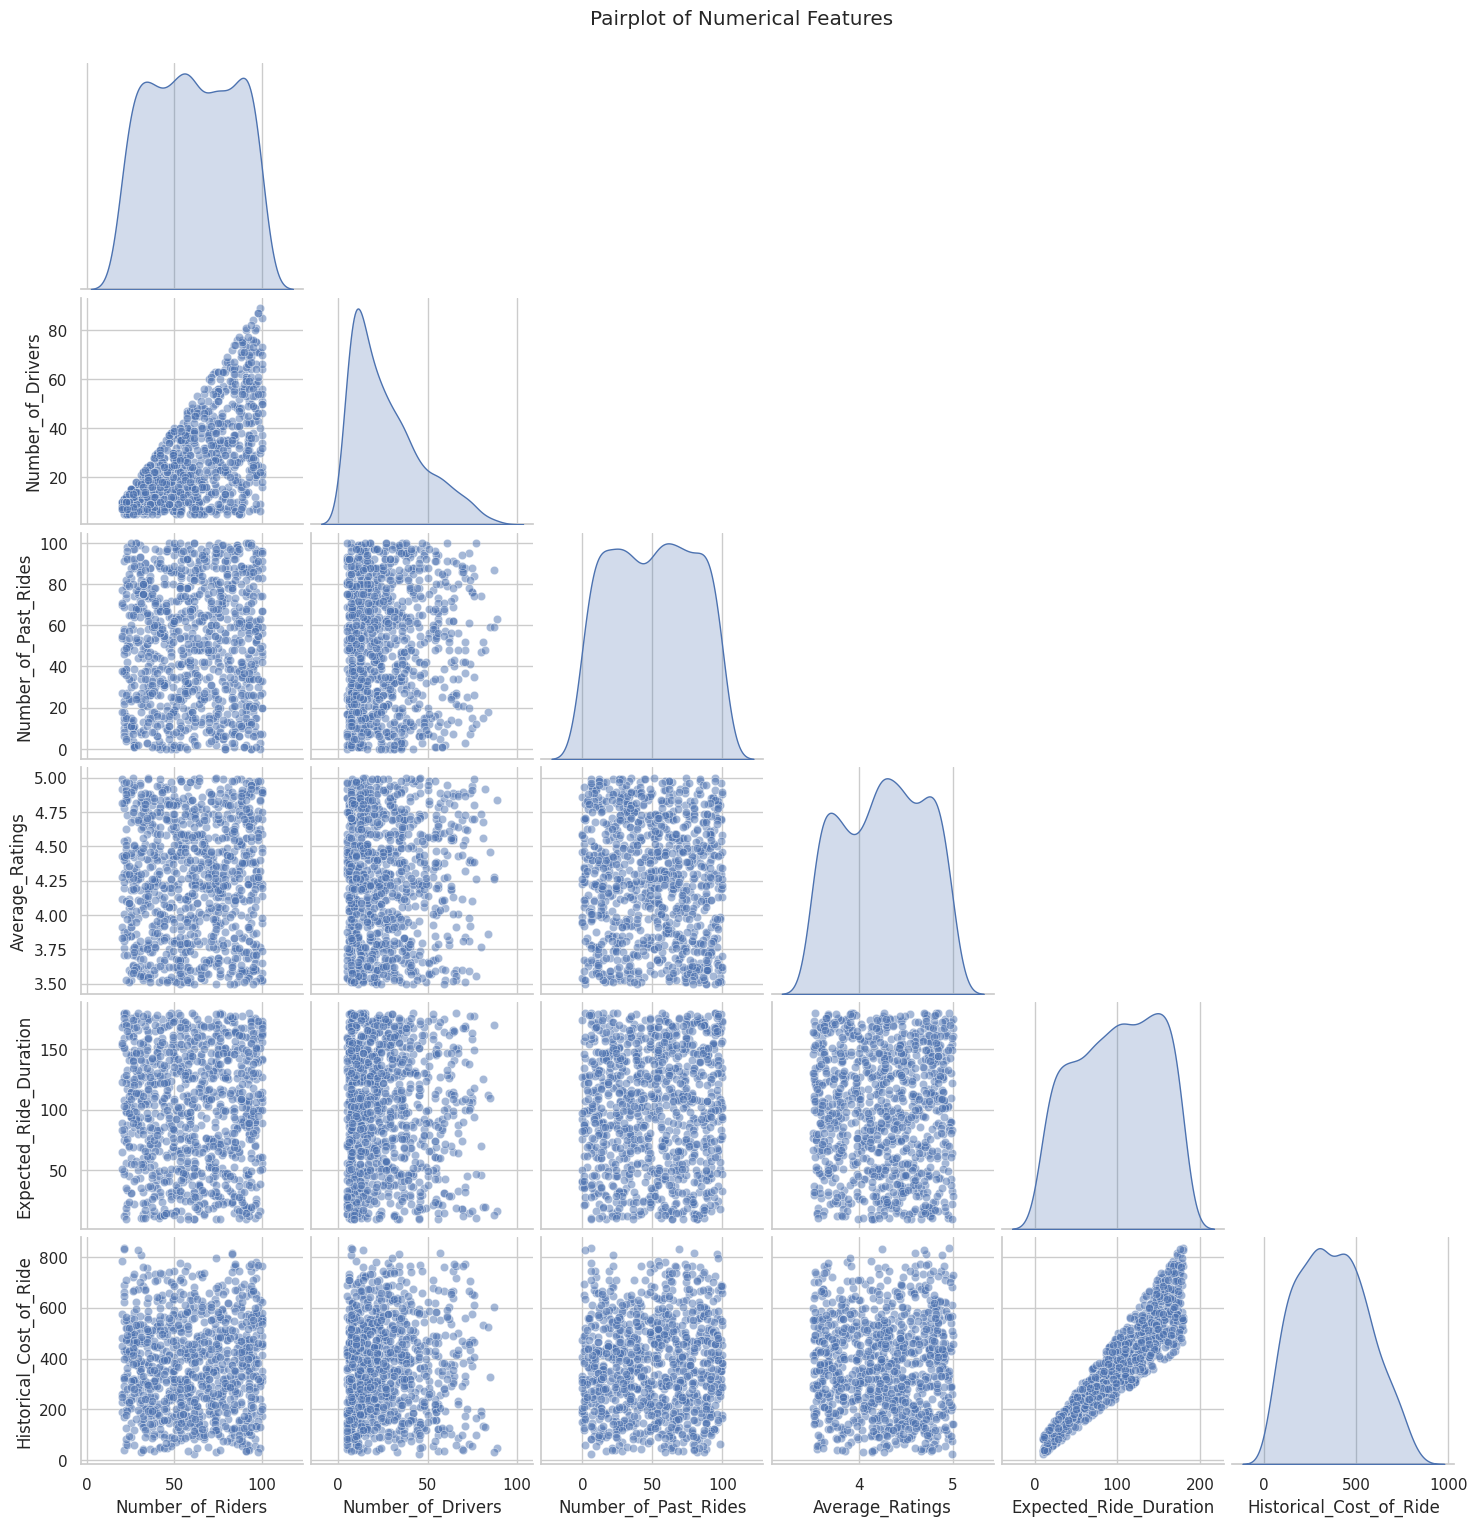

In [6]:
# Feature pair plots
print("\nPairplot of numerical features:")
# Select numerical columns
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Check if there are numerical columns to plot
if not numeric_columns.empty:
    sns.pairplot(data[numeric_columns], diag_kind='kde', corner=True, plot_kws={'alpha': 0.5})
    plt.suptitle("Pairplot of Numerical Features", y=1.02)
    plt.show()
else:
    print("No numerical features available for pairplot.")


Analyzing Categorical Features:
Categorical columns: ['Location_Category', 'Customer_Loyalty_Status', 'Time_of_Booking', 'Vehicle_Type']

Value counts for 'Location_Category':
Location_Category
Urban       346
Rural       332
Suburban    322
Name: count, dtype: int64


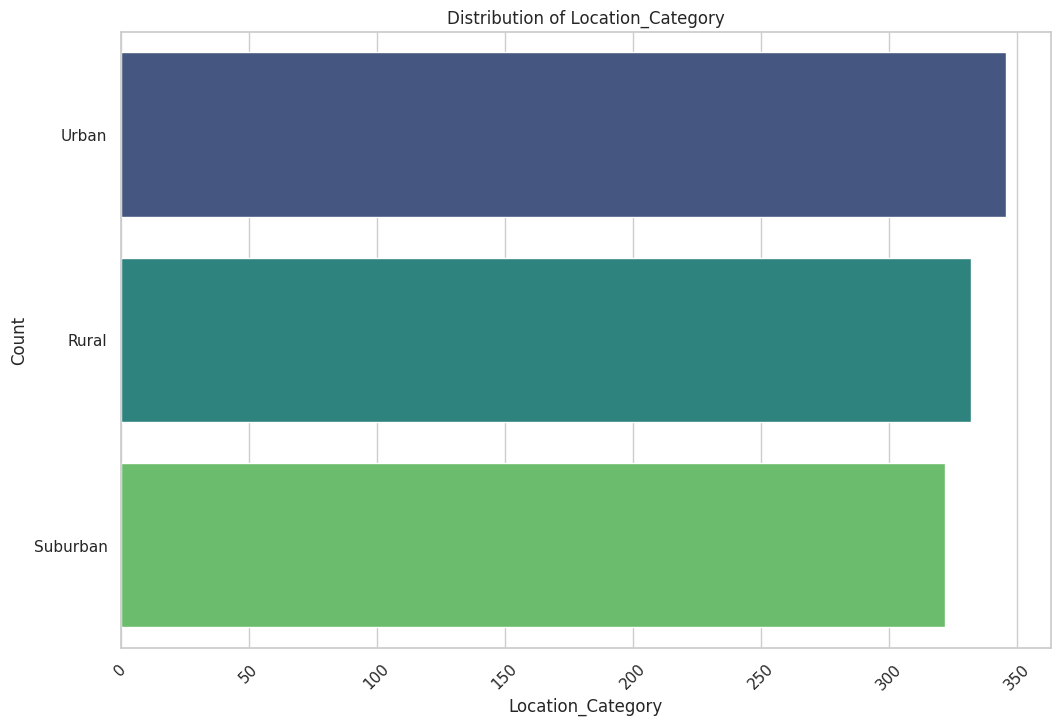


Value counts for 'Customer_Loyalty_Status':
Customer_Loyalty_Status
Silver     367
Regular    320
Gold       313
Name: count, dtype: int64


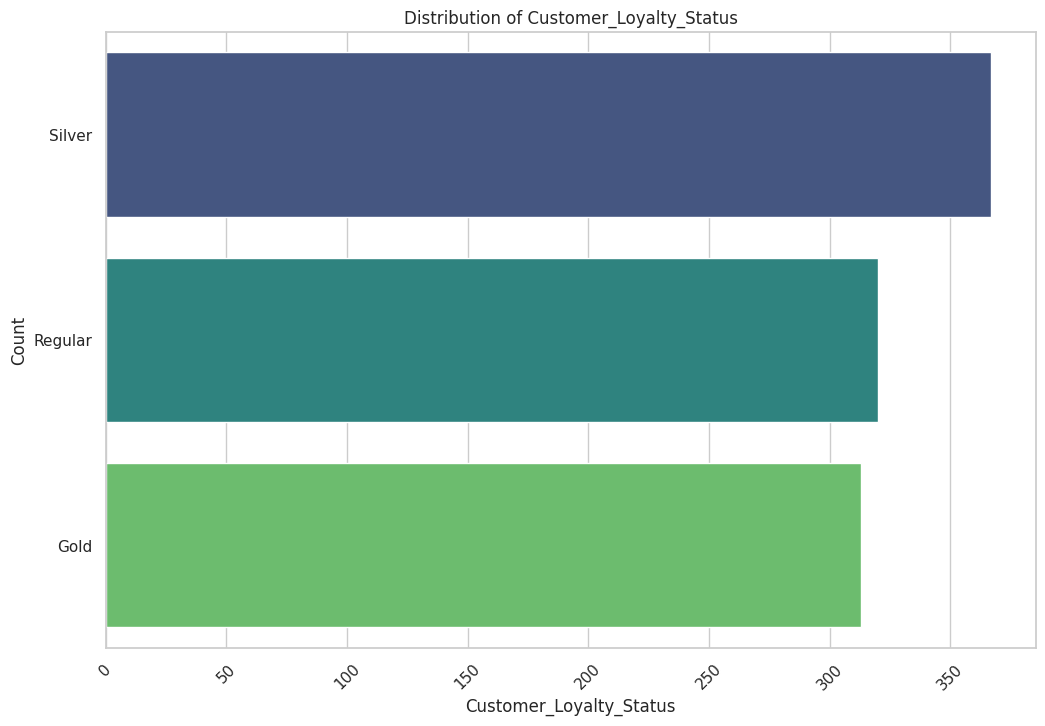


Value counts for 'Time_of_Booking':
Time_of_Booking
Night        276
Afternoon    247
Morning      246
Evening      231
Name: count, dtype: int64


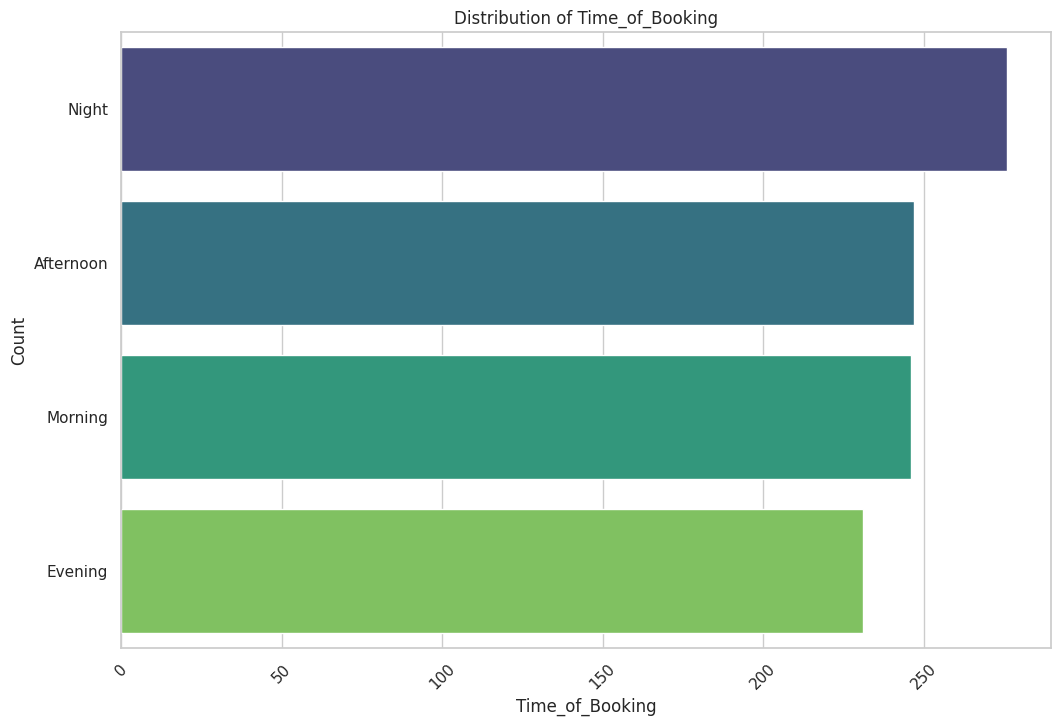


Value counts for 'Vehicle_Type':
Vehicle_Type
Premium    522
Economy    478
Name: count, dtype: int64


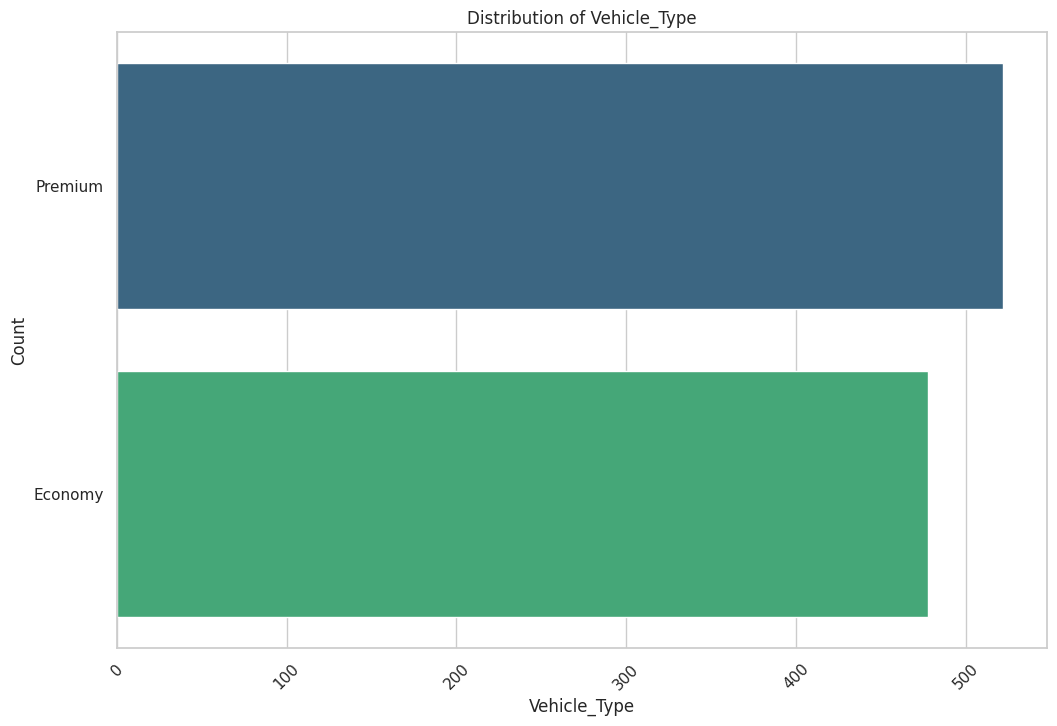

In [7]:
# Analyze Categorical Features
print("\nAnalyzing Categorical Features:")
categorical_columns = data.select_dtypes(include=['object']).columns
if not categorical_columns.empty:
    print("Categorical columns:", list(categorical_columns))
    for col in categorical_columns:
        print(f"\nValue counts for '{col}':")
        print(data[col].value_counts())

        # Bar plot for each categorical variable
        plt.figure(figsize=(12, 8))
        sns.countplot(data[col], order=data[col].value_counts().index, palette="viridis")
        plt.title(f"Distribution of {col}")
        plt.xlabel(col)
        plt.ylabel("Count")
        plt.xticks(rotation=45)
        plt.show()
else:
    print("No categorical features available for analysis.")


Analyzing Categorical Features:
Categorical columns: ['Location_Category', 'Customer_Loyalty_Status', 'Time_of_Booking', 'Vehicle_Type']

Value counts for 'Location_Category':
Location_Category
Urban       346
Rural       332
Suburban    322
Name: count, dtype: int64

Value counts for 'Customer_Loyalty_Status':
Customer_Loyalty_Status
Silver     367
Regular    320
Gold       313
Name: count, dtype: int64

Value counts for 'Time_of_Booking':
Time_of_Booking
Night        276
Afternoon    247
Morning      246
Evening      231
Name: count, dtype: int64

Value counts for 'Vehicle_Type':
Vehicle_Type
Premium    522
Economy    478
Name: count, dtype: int64


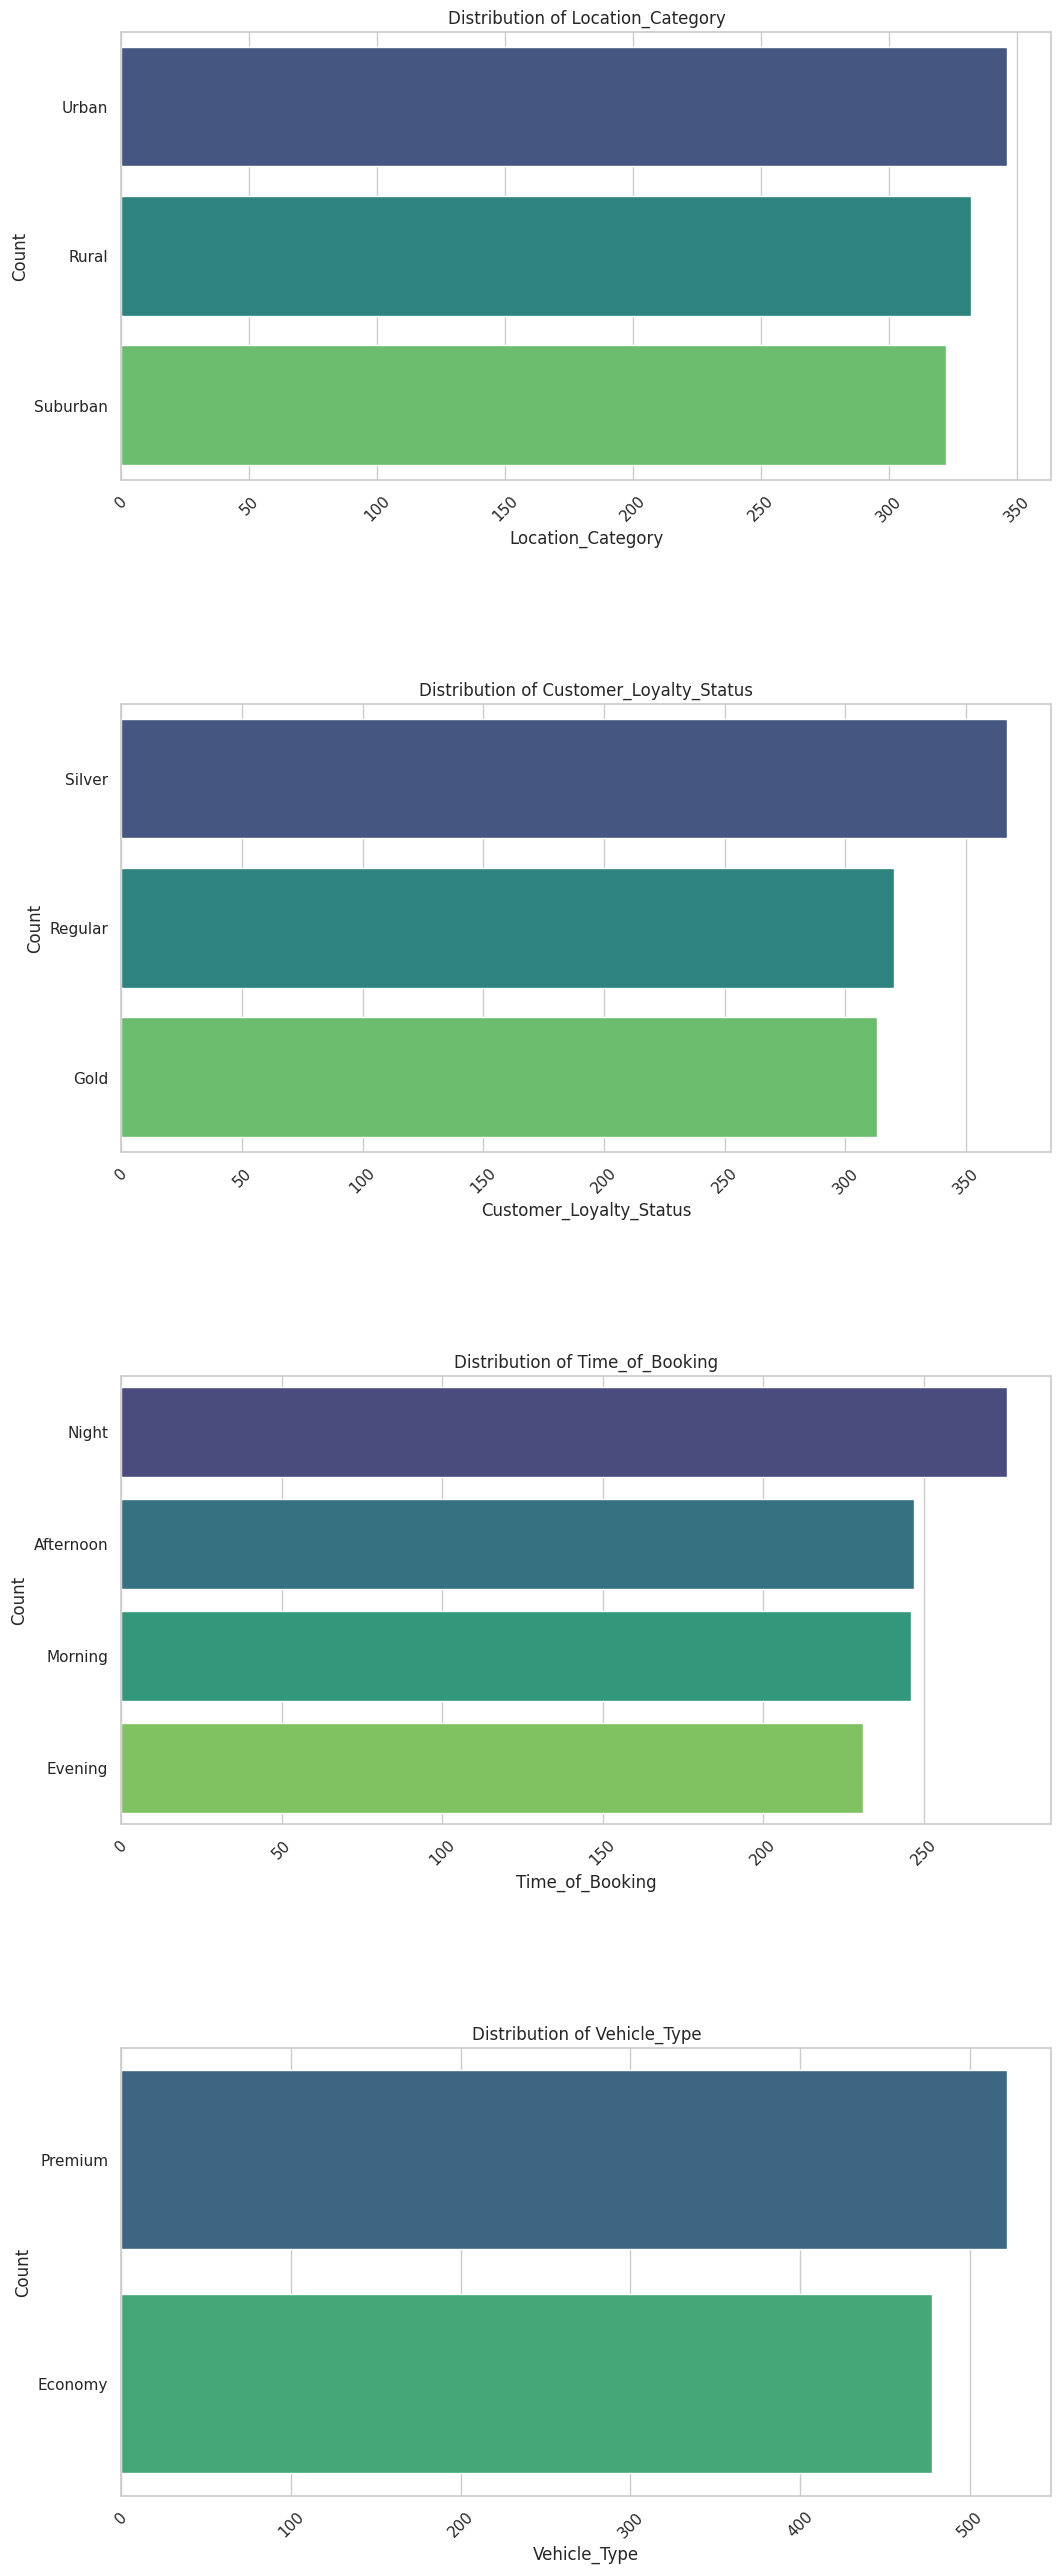

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Analyze Categorical Features
print("\nAnalyzing Categorical Features:")
categorical_columns = data.select_dtypes(include=['object']).columns

if not categorical_columns.empty:
    print("Categorical columns:", list(categorical_columns))

    # Set up the figure and subplots
    num_cols = len(categorical_columns)
    fig, axes = plt.subplots(nrows=num_cols, ncols=1, figsize=(12, 8 * num_cols))
    fig.subplots_adjust(hspace=0.5)  # Adjust space between subplots

    # Loop through each categorical column and create a bar plot
    for i, col in enumerate(categorical_columns):
        print(f"\nValue counts for '{col}':")
        print(data[col].value_counts())

        ax = axes[i] if num_cols > 1 else axes  # Handle single or multiple subplots
        sns.countplot(data[col], order=data[col].value_counts().index, palette="viridis", ax=ax)
        ax.set_title(f"Distribution of {col}")
        ax.set_xlabel(col)
        ax.set_ylabel("Count")
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

    plt.show()
else:
    print("No categorical features available for analysis.")

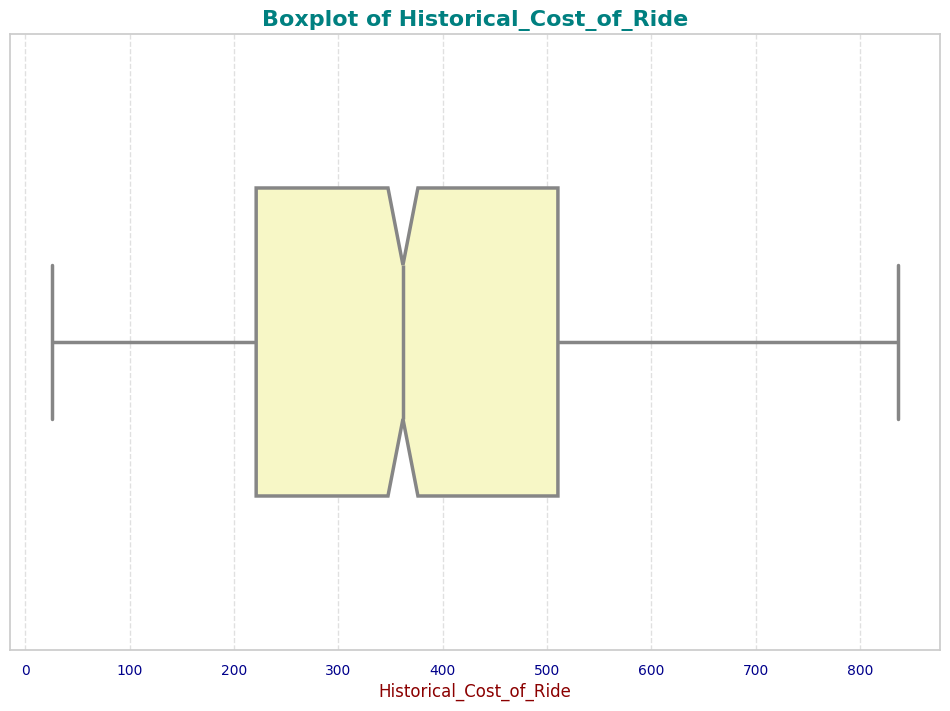


Summary statistics for 'Historical_Cost_of_Ride':
count    1000.000000
mean      372.502623
std       187.158756
min        25.993449
25%       221.365202
50%       362.019426
75%       510.497504
max       836.116419
Name: Historical_Cost_of_Ride, dtype: float64

Number of potential outliers: 0


In [9]:
# Check for outliers using box plots
import seaborn as sns
import matplotlib.pyplot as plt

column_name = 'Historical_Cost_of_Ride'  # Change this to the column you want to analyze
if column_name in data.columns:
    # Create a box plot with vibrant colors
    plt.figure(figsize=(12, 8))
    sns.boxplot(
        x=data[column_name],
        palette="Spectral",
        width=0.5,
        linewidth=2.5,
        notch=True  # Add notches for visualizing median CI
    )
    plt.title(f"Boxplot of {column_name}", fontsize=16, fontweight='bold', color='teal')
    plt.xlabel(column_name, fontsize=12, color='darkred')
    plt.xticks(fontsize=10, color='darkblue')
    plt.grid(axis='x', linestyle='--', alpha=0.6)
    plt.show()

    # Display summary statistics for further context
    print(f"\nSummary statistics for '{column_name}':")
    print(data[column_name].describe())

    # Optional: Highlight potential outliers
    Q1 = data[column_name].quantile(0.25)
    Q3 = data[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column_name] < lower_bound) | (data[column_name] > upper_bound)]
    print(f"\nNumber of potential outliers: {len(outliers)}")
else:
    print(f"'{column_name}' column not found in the dataset.")

In [10]:

def plot_scatter_with_hue(data, cost_column, duration_column, category_column):
    """
    Plots a scatter plot with the specified columns for cost, duration, and a categorical hue.

    Parameters:
    - data: pd.DataFrame, the dataset containing the columns
    - cost_column: str, the name of the column for the x-axis (e.g., cost)
    - duration_column: str, the name of the column for the y-axis (e.g., duration)
    - category_column: str, the name of the categorical column for hue

    Returns:
    - None, displays the scatter plot or prints an error message if columns are missing.
    """
    if all(col in data.columns for col in [cost_column, duration_column, category_column]):
        plt.figure(figsize=(12, 8))
        sns.scatterplot(
            x=data[cost_column],
            y=data[duration_column],
            hue=data[category_column],
            palette="viridis",  # Use a colorful palette
            s=100,  # Marker size
            alpha=0.7,  # Transparency
            edgecolor='w'  # Add white edge to markers
        )
        plt.title(f"{cost_column}C vs. {duration_column} with Categories", fontsize=16, fontweight='bold', color='teal')
        plt.xlabel(cost_column, fontsize=14, color='darkred')
        plt.ylabel(duration_column, fontsize=14, color='darkblue')
        plt.legend(title=category_column, title_fontsize=12, fontsize=10, loc='upper left', bbox_to_anchor=(1, 1))
        plt.grid(alpha=0.3)
        plt.show()
    else:
        print(f"Ensure the columns '{cost_column}', '{duration_column}', and '{category_column}' exist in the dataset.")

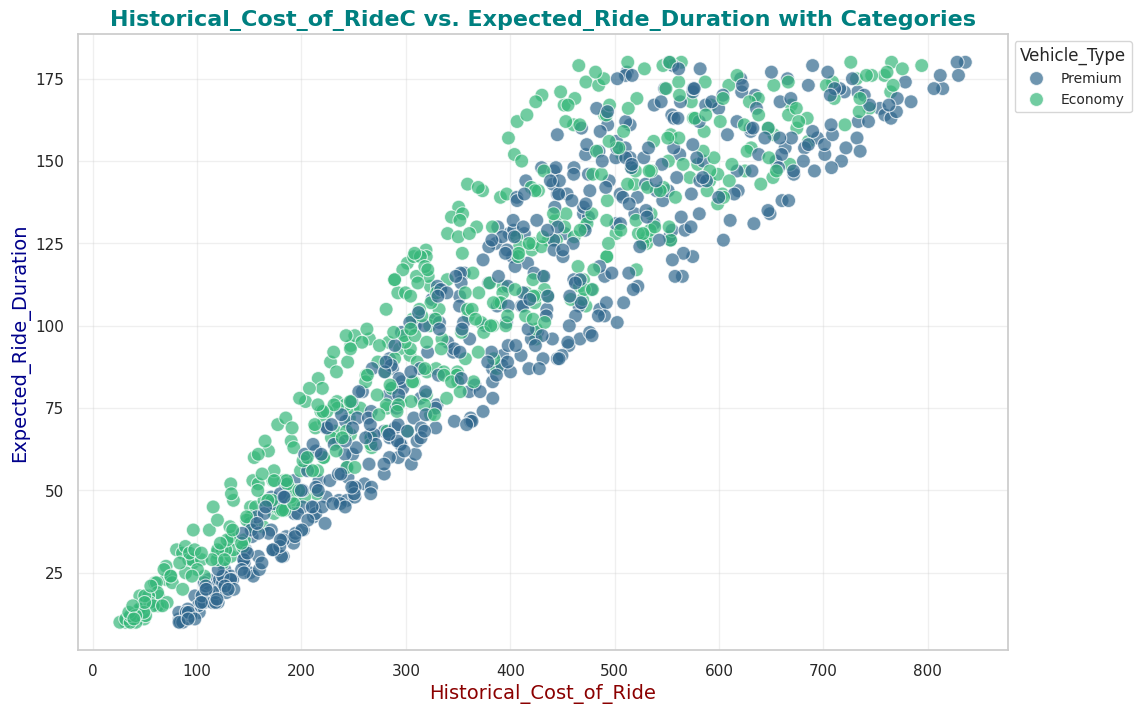

In [11]:
# Ensure relevant columns exist in the dataset
cost_column = 'Historical_Cost_of_Ride'
duration_column = 'Expected_Ride_Duration'
category_column = 'Vehicle_Type'  # Replace with the actual categorical column name
plot_scatter_with_hue(data, cost_column, duration_column, category_column)

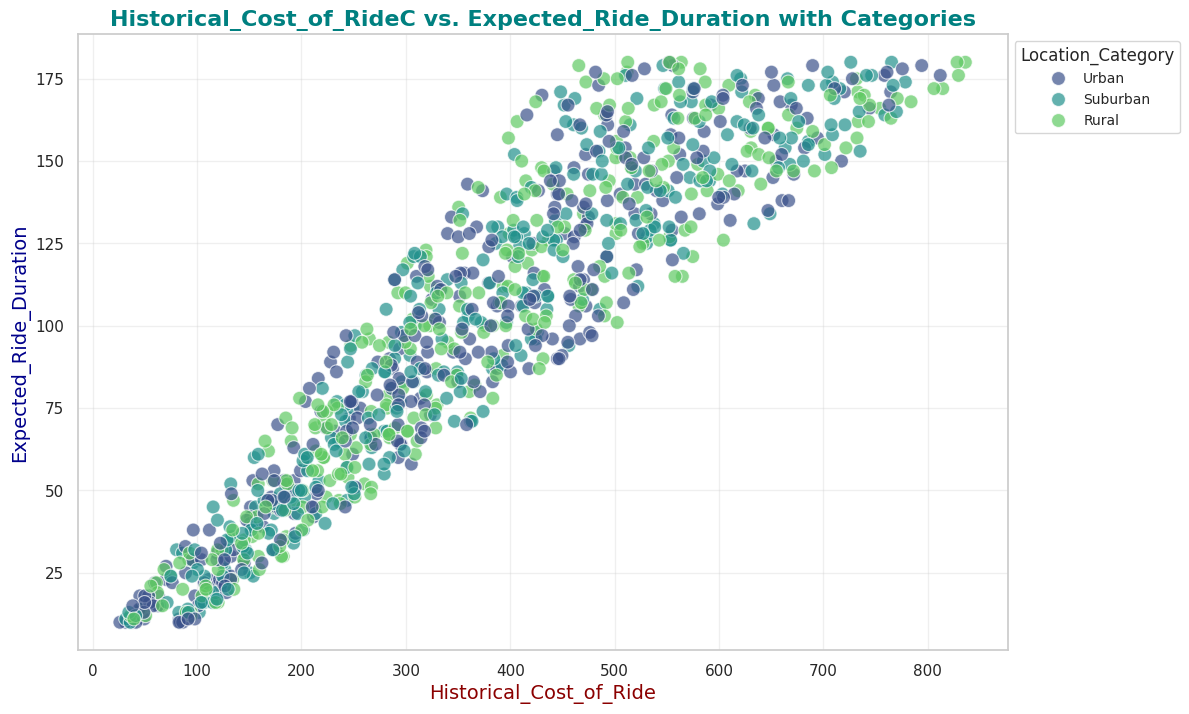

In [12]:
category_column = 'Location_Category'  # Replace with the actual categorical column name
plot_scatter_with_hue(data, cost_column, duration_column, category_column)


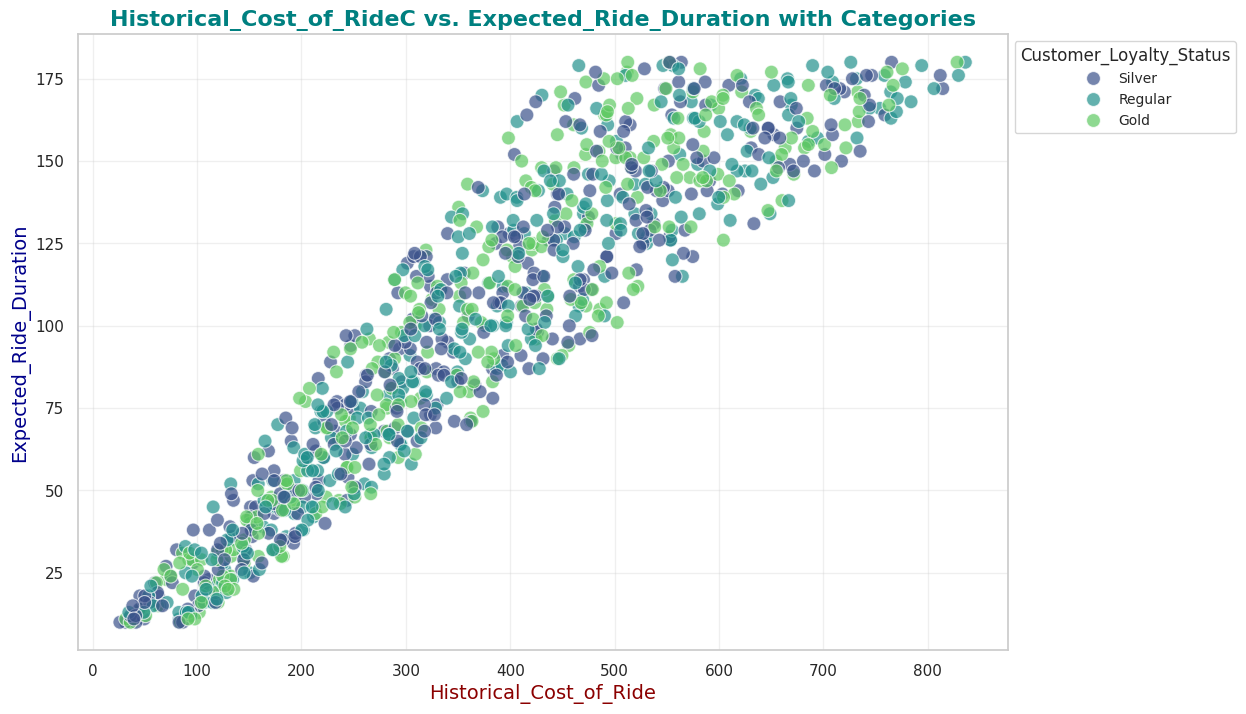

In [13]:
category_column = 'Customer_Loyalty_Status'  # Replace with the actual categorical column name
plot_scatter_with_hue(data, cost_column, duration_column, category_column)

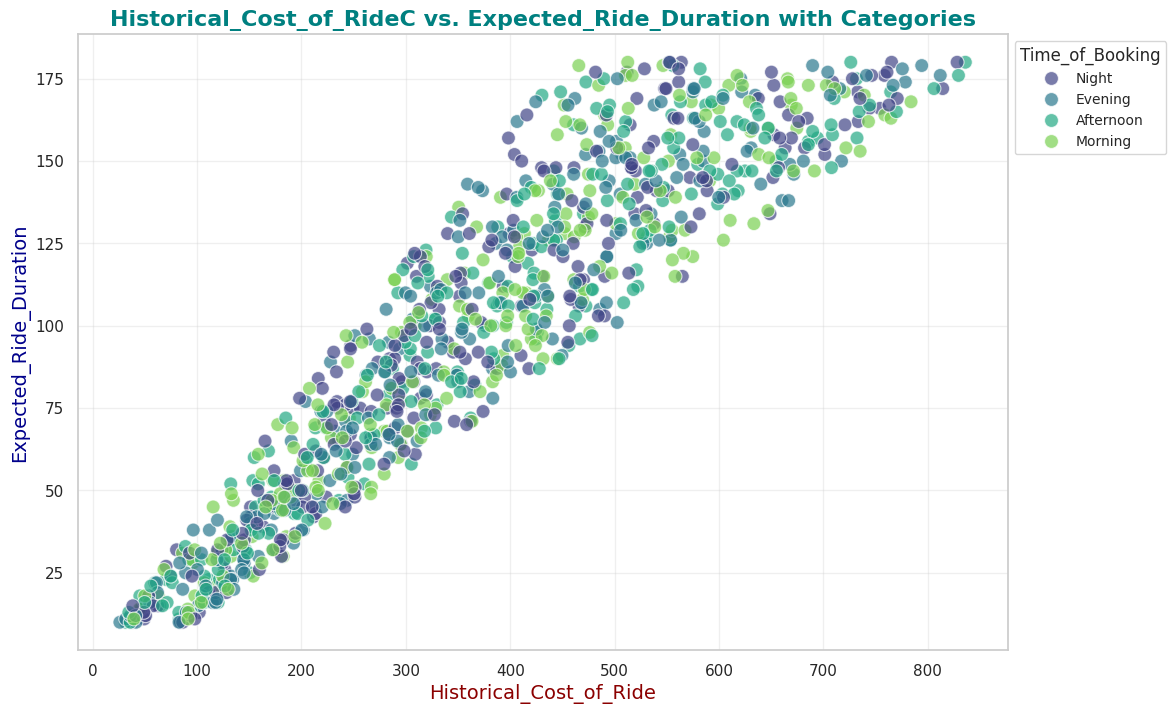

In [14]:
category_column = 'Time_of_Booking'  # Replace with the actual categorical column name
plot_scatter_with_hue(data, cost_column, duration_column, category_column)

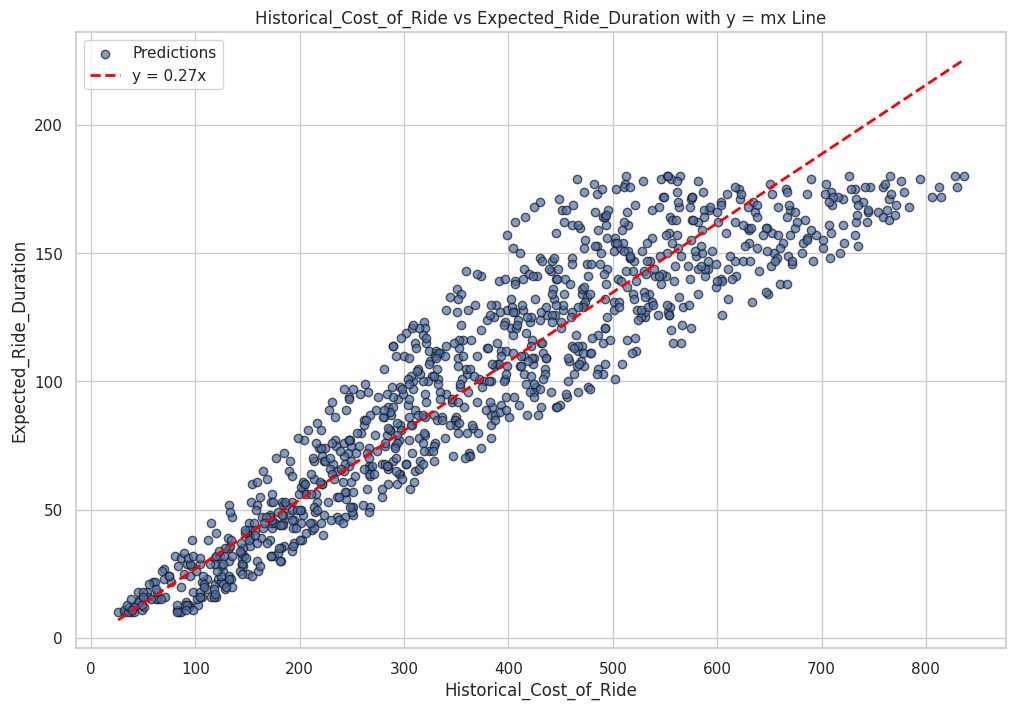

In [15]:
# Ensure columns exist in the dataset
if all(col in data.columns for col in [cost_column, duration_column]):
    # Calculate the mean of y/x
    mean_slope = (data[duration_column] / data[cost_column]).mean()

    # Plot scatter and y = mx line
    plt.figure(figsize=(12, 8))
    plt.scatter(
        data[cost_column],
        data[duration_column],
        alpha=0.7,
        edgecolor='k',
        label="Predictions"
    )

    # Add y = mx line
    x_values = np.linspace(data[cost_column].min(), data[cost_column].max(), 100)
    y_values = mean_slope * x_values
    plt.plot(x_values, y_values, color='red', linestyle='--', linewidth=2, label=f"y = {mean_slope:.2f}x")

    # Labels, title, and legend
    plt.xlabel(f"{cost_column}")
    plt.ylabel(f"{duration_column}")
    plt.title(f"{cost_column} vs {duration_column} with y = mx Line")
    plt.legend()
    plt.grid(True)
    plt.show()
else:
    print(f"Ensure the columns '{cost_column}' and '{duration_column}' exist in the dataset.")

Evaluation Metrics for y = 0.27x Line:
Mean Absolute Error (MAE): 15.10
Mean Squared Error (MSE): 361.31
Root Mean Squared Error (RMSE): 19.01
R^2 Score: 0.85


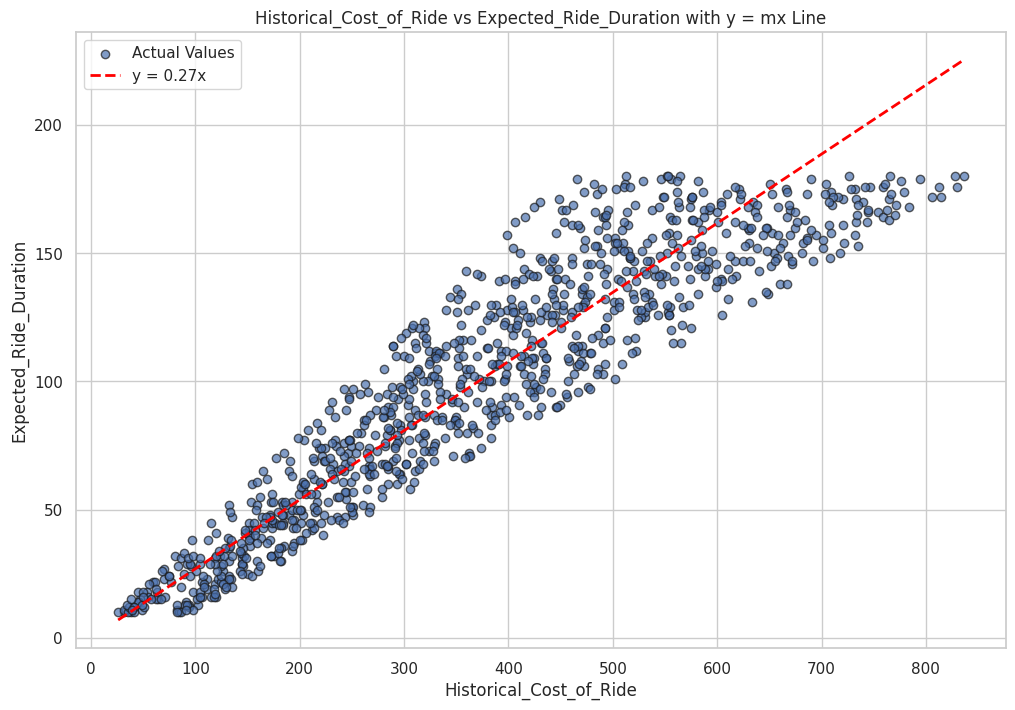

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Ensure columns exist in the dataset
if all(col in data.columns for col in [cost_column, duration_column]):
    # Calculate the mean slope
    mean_slope = (data[duration_column] / data[cost_column]).mean()

    # Predicted values using y = mx
    predicted_values = mean_slope * data[cost_column]

    # Calculate metrics
    mae = mean_absolute_error(data[duration_column], predicted_values)
    mse = mean_squared_error(data[duration_column], predicted_values)
    rmse = np.sqrt(mse)
    r2 = r2_score(data[duration_column], predicted_values)

    # Plot scatter and y = mx line
    plt.figure(figsize=(12, 8))
    plt.scatter(
        data[cost_column],
        data[duration_column],
        alpha=0.7,
        edgecolor='k',
        label="Actual Values"
    )

    # Add y = mx line
    x_values = np.linspace(data[cost_column].min(), data[cost_column].max(), 100)
    y_values = mean_slope * x_values
    plt.plot(x_values, y_values, color='red', linestyle='--', linewidth=2, label=f"y = {mean_slope:.2f}x")

    # Labels, title, and legend
    plt.xlabel(f"{cost_column}")
    plt.ylabel(f"{duration_column}")
    plt.title(f"{cost_column} vs {duration_column} with y = mx Line")
    plt.legend()
    plt.grid(True)
    plt.show()
else:
    print(f"Ensure the columns '{cost_column}' and '{duration_column}' exist in the dataset.")
